# Upper Confidence Bound (UCB)

Multi-Armed Bandit Problem:
<br>
One armed bandit = slot machine
<br>
Multi-armed = multiple machines -> play them to maximise return
<br>
Each machine has distribution of numbers/outcomes out of which machine picks out the result -> figure out which distr is best and exploit while exploration to minimise regret

Problem: d ads -> each time user connects to web page = 1 round -> each round n, 1 ad is chosen to be displayed -> each round n, ad i gives reward ri(n) = 0 or 1 (1 if user clicks, 0 otherwise) -> maximise total reward over many rounds

At each round n, 2 numbers are considered for each ad i: <br>
Ni(n) = no. of times i was selected upto n
<br>
Ri(n) = sum of rewards of i upto n
<br>
average reward of i upto n = Ri/Ni
<br>
confidence interval at n = sqrt(3/2 log(n)/Ni)
<br>
Select ad having max UCB average+confidence

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [5]:
import math
N = 10000
d = 10
ads_selected = []
no_of_selections = [0]*d
sum_of_rewards = [0]*d
total_reward = 0
for n in range(N):
    ad = 0
    max_UCB = 0
    for i in range(d):
        if no_of_selections[i] > 0:
            average_reward = sum_of_rewards[i]/no_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1)/no_of_selections[i])
            UCB = average_reward + delta_i
        else:
            UCB = 1e400
        if UCB>max_UCB:
            max_UCB = UCB
            ad = i
    ads_selected.append(ad)
    no_of_selections[ad] += 1
    reward = df.values[n, ad]
    sum_of_rewards[ad] += reward
    total_reward += reward



## Visualising the results

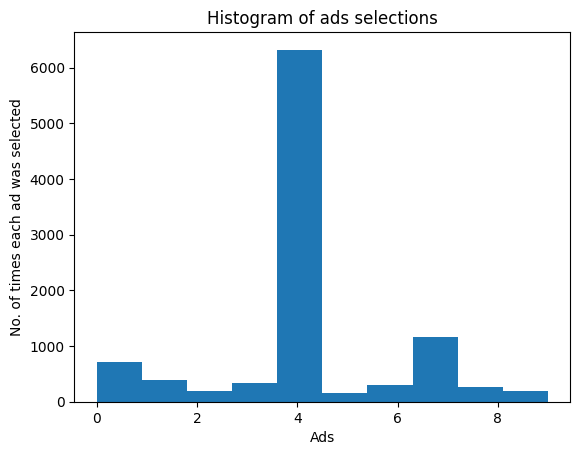

In [6]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('No. of times each ad was selected')
plt.show()